## Assignment 5 
### May 3 2021
### Meenu Ravi

### Part 1. 10 pts - Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sktime.forecasting.all import temporal_train_test_split
from statsmodels.tsa.stattools import kpss, adfuller
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error 
import math
warnings.filterwarnings('ignore')

#### A. 5 pts Merge the data sets together, should have 735 rows of data

In [2]:
co2= pd.read_csv("hw5_data_co2.csv")
temp= pd.read_csv("hw5_data_temp.csv")


In [3]:
co2['ds'] =co2['ds'].astype('datetime64[ns]').dt.strftime('%Y-%m')


In [4]:
temp['ds'] =temp['ds'].astype('datetime64[ns]').dt.strftime('%Y-%m')


In [5]:
data = co2.merge(temp, on="ds", how = 'outer')
data.dropna(inplace=True)
data = data.groupby('ds').last()
data

,co2,temp
ds,,
1958-03,315.700,57.38
1958-04,317.450,57.29
1958-05,317.510,57.32
1958-06,316.685,57.02
1958-07,315.860,57.27
...,...,...
2019-01,410.920,58.29
2019-02,411.660,58.37
2019-03,412.000,58.59


#### B. 5 pts Complete a quantitative and qualitative data exploration. Include a verbal summary of your EDA.

In [6]:
data.shape

(735, 2)

In [7]:
missing_values=data['co2'].isna().sum()
full=len(data)
percent=(missing_values/full)*100
percent

0.0

In [8]:
missing_values=data['temp'].isna().sum()
full=len(data)
percent=(missing_values/full)*100
percent

0.0

In [9]:
data.describe()

,co2,temp
count,735.000000,735.000000
mean,354.210673,57.603293
std,27.922811,0.397159
min,313.200000,56.730000
25%,328.785000,57.280000
50%,351.340000,57.590000
75%,376.515000,57.915000
max,414.830000,58.840000


In [10]:
data.dtypes

co2     float64
temp    float64
dtype: object

In [11]:
duplicate_rows = data[data.duplicated()]
print("Duplicate rows: ", duplicate_rows.shape)

Duplicate rows:  (0, 2)


(array([], dtype=int64),)


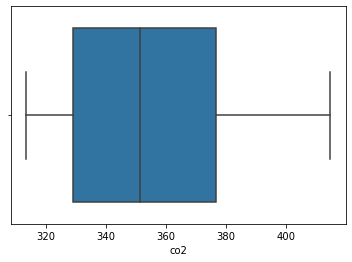

In [12]:
sns.boxplot(x=data['co2'])
print(np.where(data['co2']>data['co2'].quantile(0.75) + (1.5 * (data['co2'].quantile(0.75)-
                                                                  data['co2'].quantile(0.25)))))

(array([], dtype=int64),)


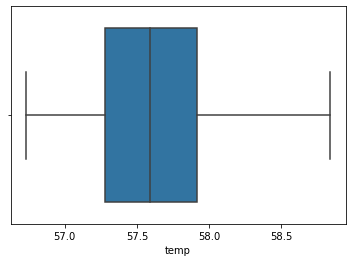

In [13]:
sns.boxplot(x=data['temp'])
print(np.where(data['temp']>data['temp'].quantile(0.75) + (1.5 * (data['temp'].quantile(0.75)-
                                                                  data['temp'].quantile(0.25)))))

<AxesSubplot:xlabel='ds'>

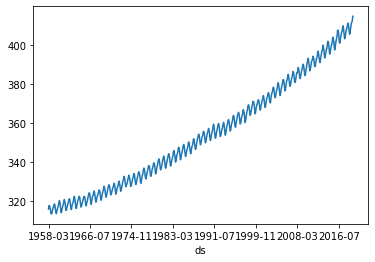

In [14]:
data['co2'].plot()


<AxesSubplot:xlabel='ds'>

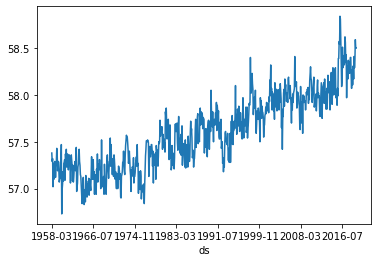

In [15]:
data['temp'].plot()

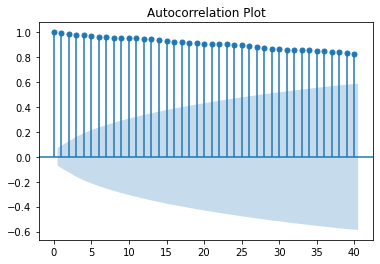

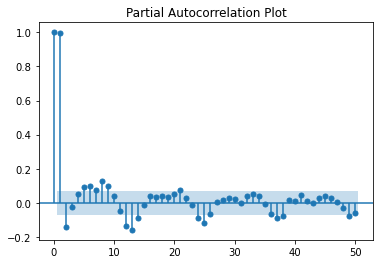

In [16]:
p=plot_acf(data['co2'], lags=40,title='Autocorrelation Plot')
p = plot_pacf(data['co2'],lags=50,  title='Partial Autocorrelation Plot')

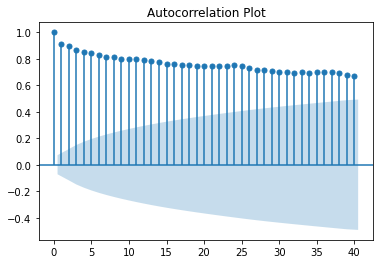

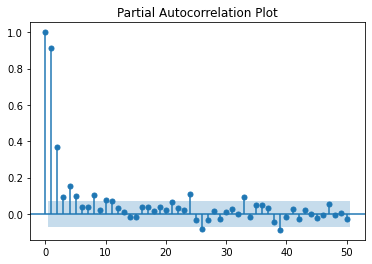

In [17]:
p=plot_acf(data['temp'], lags=40,title='Autocorrelation Plot')
p = plot_pacf(data['temp'],lags=50,  title='Partial Autocorrelation Plot')

In [18]:
def adf_kpss_test(timeseries,trend='c'):
    #Perform Dickey-Fuller test:
    df_results=[]
    kpss_results=[]
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    print("---------------")
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression=trend)
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)
    for i in dfoutput:
        i=round(i,6)
        df_results.append(i)
    for i in kpss_output:
        i=round(i,6)
        kpss_results.append(i)
    return (df_results,kpss_results)

In [19]:
alpha = 0.05
ad_fuller_results,kpss_test_results = adf_kpss_test(data['co2'], trend='c')
ad_fuller_results
ad_fuller_pval = ad_fuller_results[1]
ad_fuller_bool = ad_fuller_pval <= alpha

print(f'stationarity from ad_fuller test: {ad_fuller_bool}')

kpss_pval = kpss_test_results[1]
kpss_test_bool = kpss_pval >= alpha

print(f'stationarity from KPSS test: {kpss_test_bool}')

Results of Dickey-Fuller Test:
Test Statistic                   5.242612
p-value                          1.000000
#Lags Used                      20.000000
Number of Observations Used    714.000000
Critical Value (1%)             -3.439542
Critical Value (5%)             -2.865596
Critical Value (10%)            -2.568930
dtype: float64
---------------
Results of KPSS Test:
Test Statistic            3.55359
p-value                   0.01000
Lags Used                20.00000
Critical Value (10%)      0.34700
Critical Value (5%)       0.46300
Critical Value (2.5%)     0.57400
Critical Value (1%)       0.73900
dtype: float64
stationarity from ad_fuller test: False
stationarity from KPSS test: False


In [20]:
alpha = 0.05
ad_fuller_results,kpss_test_results = adf_kpss_test(data['temp'], trend='c')
ad_fuller_results
ad_fuller_pval = ad_fuller_results[1]
ad_fuller_bool = ad_fuller_pval <= alpha

print(f'stationarity from ad_fuller test: {ad_fuller_bool}')

kpss_pval = kpss_test_results[1]
kpss_test_bool = kpss_pval >= alpha

print(f'stationarity from KPSS test: {kpss_test_bool}')

Results of Dickey-Fuller Test:
Test Statistic                  -1.120522
p-value                          0.706819
#Lags Used                      10.000000
Number of Observations Used    724.000000
Critical Value (1%)             -3.439414
Critical Value (5%)             -2.865540
Critical Value (10%)            -2.568900
dtype: float64
---------------
Results of KPSS Test:
Test Statistic            3.347826
p-value                   0.010000
Lags Used                20.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
stationarity from ad_fuller test: False
stationarity from KPSS test: False


I performed qualitative and quantitative EDA on this data. I started by just looking at the dimensions and seeing the data types present in this dataset. I saw that the first column was dates and the second column was the co2 level stored as floats and the third column was the temperature also stored as a float. The co2 levels ranged from  to 313 to 414. The temperature ranged from 56 to 58 degrees. By looking at the various statistics, I understood a little bit more about the data. In the total 735 rows, I found that there were no missing values or duplicates in either of the columns. Next, I plotted the co2 levels and found that from 1958 to 2019, the co2 increases seasonally. Next, when I plotted the temperature, I saw there was no seasonality but there was also no stationarity because in the plot, I see the variance is not stable and the mean is not stable. In the ACF and PACF plots for each, I saw that the co2 levels had a monthly seasonality because there were spikes at the 12, 24, 36... In the temperature, I saw there was a degree of autocorrelation because there were significant spikes in the ACF and PACF plots. I still performed the adf and kpss tests to ensure my prediction. The ADF and KPSS tests concluded that both co2 and temperature were not stationary.

### Part 2. 35 pts – ARIMA with external regressors

#### A. 7 pts Split into train test. Determine the transformation, seasonal differencing & non seasonal differencing orders if required. Include the following: plot of differenced data, ADF results, kpss results, ACF/PACF plots.

Converting to proper format and setting frequency

In [21]:
data_series=data['temp']
data_series.index=pd.core.indexes.period.PeriodIndex(data.index.tolist(),freq='m')
data_series

1958-03    57.38
1958-04    57.29
1958-05    57.32
1958-06    57.02
1958-07    57.27
           ...  
2019-01    58.29
2019-02    58.37
2019-03    58.59
2019-04    58.50
2019-05    58.50
Freq: M, Name: temp, Length: 735, dtype: float64

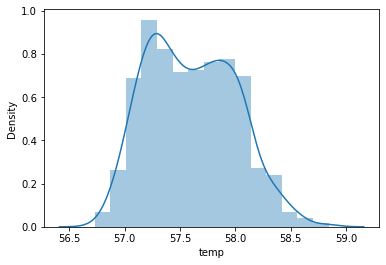

In [22]:
sns.distplot(data_series)
plt.show()

Here, I saw that the temperature dataseries almost has a normal distribution. Therefore, I felt that we did not need to do a box cox transformation. I went stright to splitting the data and using differencing.

In [23]:
y_train, y_test = temporal_train_test_split(data_series)

In [24]:
y_train_nonseas_diff = y_train.diff().dropna()
y_train_nonseas_diff

1958-04   -0.09
1958-05    0.03
1958-06   -0.30
1958-07    0.25
1958-08   -0.17
           ... 
2003-09   -0.03
2003-10    0.03
2003-11   -0.21
2003-12    0.22
2004-01   -0.14
Freq: M, Name: temp, Length: 550, dtype: float64

<AxesSubplot:>

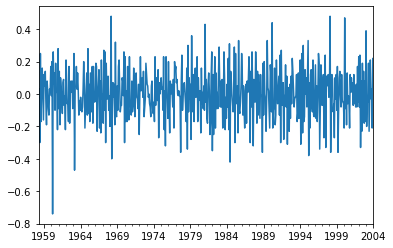

In [25]:
y_train_nonseas_diff.plot()

In [26]:
alpha = 0.05
ad_fuller_results,kpss_test_results = adf_kpss_test(y_train_nonseas_diff, trend='c')
ad_fuller_results
ad_fuller_pval = ad_fuller_results[1]
ad_fuller_bool = ad_fuller_pval <= alpha

print(f'stationarity from ad_fuller test: {ad_fuller_bool}')

kpss_pval = kpss_test_results[1]
kpss_test_bool = kpss_pval >= alpha

print(f'stationarity from KPSS test: {kpss_test_bool}')

Results of Dickey-Fuller Test:
Test Statistic                -1.215938e+01
p-value                        1.505895e-22
#Lags Used                     6.000000e+00
Number of Observations Used    5.430000e+02
Critical Value (1%)           -3.442450e+00
Critical Value (5%)           -2.866877e+00
Critical Value (10%)          -2.569613e+00
dtype: float64
---------------
Results of KPSS Test:
Test Statistic            0.049108
p-value                   0.100000
Lags Used                19.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64
stationarity from ad_fuller test: True
stationarity from KPSS test: True


The plot of the differenced data looks to be stationary. I do not see a varying mean or variance. I moved forward and performed the adf and kpss tests and found that indeed the data was stationary once being differenced.

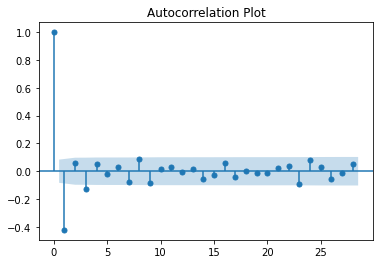

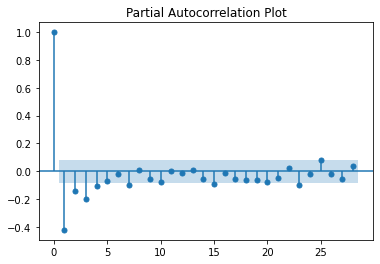

In [27]:
p = plot_acf(y_train_nonseas_diff, title='Autocorrelation Plot')
p = plot_pacf(y_train_nonseas_diff, title='Partial Autocorrelation Plot')

Above are the acf and pacf plots. I decided to keep the lag at 0 because it helps me confirm that at lag 0, the data correlates with itself and therefore shows 1.

#### B. 7 pts Fit a SARIMA or ARIMA model based on your examinations. Examine the residuals. Include the following: plot, histogram, ACF, Ljung Box results. Check if auto arima gives you a different order. If this is a better model, examine the residuals of this model.

I chose to use 3,1,1 as the order. After analyzing the acf and pacf plots from above, I saw that in the acf plot, it decays after lag 1. So for the MA component, I used 1. When I examined the pacf plot, I saw that the significant lags wer 1,2,and 3 and then it tapers off. I kept the spike at lag 0.
The autocorrelation at lag 0 that is the large spike. It is 1.0, so we know that a time series is 100% correlated with itself.  If we take 2 copies of the same time series, which is same as lag=0, we should see 100% correlation.
I used this method from the ta session.

In [28]:
arima_model = sm.tsa.statespace.SARIMAX(endog=y_train,order=(3,1,1))
arima_fit = arima_model.fit()
print(arima_fit.summary())

NameError: name 'sm' is not defined

In [ ]:
resid = arima_fit.resid
resid=resid[1:]
resid.plot()
plt.show()

In [ ]:
resid.hist()

In [ ]:
plot_acf(resid, lags=48)
plt.show()

In [ ]:
sm.stats.acorr_ljungbox(resid, lags=[10], return_df=True, boxpierce=True)

Now, I will fit an auto arima and see if it gives a better result.

In [ ]:
from pmdarima import auto_arima
am=auto_arima(y_train, seasonal=False,start_p=0,d=1,start_q=0,
          suppress_warnings=True)
am.fit(y_train)

In [ ]:
am.summary()

In [ ]:
residuals=pd.Series(am.resid())
residuals=residuals[1:]

In [ ]:
residuals.plot()

In [ ]:
residuals.hist()

In [ ]:
plot_acf(residuals, lags=48)
plt.show()

In [ ]:
sm.stats.acorr_ljungbox(residuals, lags=[15], return_df=True, boxpierce=True)

To validate our models, we can look the model residuals. The residuals are the difference between the actual data and the predicted value from the (s)arima model. Based on the visuals above, they are performing as residuals should. 

Plot (Model 1)

The plot of the residuals look like white noise. This way, I can be sure that none of the signal has escaped my model fit and has ended up in the residuals by mistake. 

Plot (Model 2)

Here also, the plot of the residuals look like white noise. This way, I can be sure that none of the signal has escaped my model fit and has ended up in the residuals by mistake.

Histogram (Model 1)

The residuals should also be normally distributed. My histagram shows a normally distributed model. You can see the mean is centered around 0. A normally distributed residuals describes the actual distribution of the random errors in actuality reasonably well. 

Histogram (Model 2)

Here also, the residuals should also be normally distributed. The two histogram above are very similar with only a slight difference. My histagram shows a normally distributed model. You can see the mean is centered around 0. A normally distributed residuals describes the actual distribution of the random errors in actuality reasonably well.

ACF (Model 1)
The residuals should not show a trend or autocorrelation, because then we have failed to capture it in our model instead. The residuals should be stationary. In the ACF plot, I can see there isn't much autocorrelation. For ACF the AC at lag 0 that is the only large spike. It is 1.0, so we know that a time series is 100% correlated with itself. If we take 2 copies of the same time series, which is same as lag=0, we see 100% correlation.

ACF (Model 2)
The residuals should not show a trend or autocorrelation, because then we have failed to capture it in our model instead. The residuals should be stationary. In the ACF plot, I can see there isn't took much autocorrelation. There is however, a spike at the lag 1. This shows there is slight autocorrelation there. The only large spike here, is again at lag 0. This makes sense because at lag 0, the series is autocorrelated with itself.

Ljung Box (Model 1)

I also performed the Ljung box test (portmanteau). The p-value of the test is 0.43, which is well above 0.05. A significant p-value in this test rejects the null hypothesis that the time series isn't autocorrelated. But since the pvalue is insignificant, we can accept the null hypothesis and confirm that the model does show a lack of fit and there is no autocorrelation and thus is a good model.

Ljung Box (Model 2)

Here, the p-value of the test is 0.35, which is also well above 0.05. A significant p-value in this test rejects the null hypothesis that the time series isn't autocorrelated. But since the pvalue is insignificant, we can accept the null hypothesis and confirm that the model does show a lack of fit and there is no autocorrelation and thus is a good model.

#### C. 7 pts Using your best model, predict the test set. Include the following: MAE, MSE, MAPE, sMAPE, MASE. Can use prebuilt functions or calculate by hand.

My best model from above was the autoarima one with the order of 2,1,1. This one had a lower aic score: -597 as compared to my arima model which had an aic score of -594. Also, examining the residuals, I saw that the two models were very similar.

In [ ]:
y_pred = pd.DataFrame(am.predict(n_periods = len(y_test)),index=y_test.index)
y_pred.columns = ['temp']

In [ ]:
y_pred_series=y_pred['temp']
y_pred_series.index=pd.core.indexes.period.PeriodIndex(y_test.index.tolist(),freq='m')
y_pred_series

In [ ]:
y_train.plot()
y_test.plot(color = 'grey')
y_pred_series.plot(color='red')

In [ ]:
def MASE(training_series, testing_series, prediction_series):
   
    n = training_series.shape[0]
    d = np.abs(  np.diff( training_series) ).sum()/(n-1)
    
    errors = np.abs(testing_series - prediction_series )
    return errors.mean()/d


In [ ]:
mae = mean_absolute_error(y_test, y_pred_series)
mse = mean_squared_error(y_test, y_pred_series)
rmse = math.sqrt(mse)
smape = smape_loss(y_test, y_pred_series)
mape = mape_loss(y_test, y_pred_series)
mase= MASE(y_train, y_test, y_pred_series)

In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'SMAPE: {smape}')
print(f'MAPE: {mape}')
print(f'MASE: {mase}')

#### D. 7 pts Refit your best model by adding co2 as an external regressor. Examine the residuals of this model.

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
from datetime import datetime
import requests
from io import BytesIO

In [ ]:
y_train, y_test = temporal_train_test_split(data)

In [ ]:
endog = y_train['temp']
exog = y_train['co2']

In [ ]:
endog.index.name='ds'
endog.index=pd.core.indexes.period.PeriodIndex(y_train.index.tolist(),freq='m')
endog.index

In [ ]:
exog.index=pd.core.indexes.period.PeriodIndex(y_train.index.tolist(),freq='m')

exog.index

In [ ]:
mod = sm.tsa.statespace.SARIMAX(endog, exog, order=(2,1,1))
exreg = mod.fit(disp=False)
print(exreg.summary())

In [ ]:
residuals=exreg.resid
residuals=residuals[1:]
residuals

In [ ]:
residuals.plot()
plt.show()

In [ ]:
residuals.hist()

In [ ]:
plot_acf(residuals, lags=48)
plt.show()

In [ ]:
sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True, boxpierce=True)

To validate our models, we can look the model residuals. The residuals are the difference between the actual data and the predicted value from the auto arima model. Based on the visuals above, they are performing as residuals should. 

Plot 

The plot of the residuals look like white noise. This way, I can be sure that none of the signal has escaped my model fit and has ended up in the residuals by mistake. It also looks pretty stationary.

Histogram 

The residuals should also be normally distributed. My histagram shows a normally distributed model. You can see the mean is centered around 0. A normally distributed residuals describes the actual distribution of the random errors in actuality reasonably well. I also like this histogram because it has a pretty symmetrical bell curve shape.

ACF 

The residuals should not show a trend or autocorrelation, because then we have failed to capture it in our model instead. The residuals should be stationary. In the ACF plot, I can see there isn't much autocorrelation. For ACF the AC at lag 0 that is the only large spike. It is 1.0, so we know that a time series is 100% correlated with itself. If we take 2 copies of the same time series, which is same as lag=0, we see 100% correlation.

Ljung Box

I also performed the Ljung box test (portmanteau). The p-value of the test is 0.077, which is above 0.05. A significant p-value in this test rejects the null hypothesis that the time series isn't autocorrelated. But since the pvalue is insignificant, we can accept the null hypothesis and confirm that the model does show a lack of fit and there is no autocorrelation and thus is a good model.


#### E. 7 pts Predict the test set. Include the following: MAE, MSE, MAPE, sMAPE, MASE. Can use prebuilt functions or calculate by hand.

In [ ]:
predictions = exreg.predict(start = '2004-02', end = '2019-05',exog=y_test['co2'], dynamic= True)
predictions

In [ ]:
y_train_temp=y_train['temp']
y_train_temp.index=pd.core.indexes.period.PeriodIndex(y_train['temp'].index.tolist(),freq='m')


In [ ]:
y_test_temp=y_test['temp']
y_test_temp.index=pd.core.indexes.period.PeriodIndex(y_test['temp'].index.tolist(),freq='m')


In [ ]:
y_train_temp.plot()
y_test_temp.plot(color = 'grey')
predictions.plot(color='red')

In [ ]:
def MASE(training_series, testing_series, prediction_series):
   
    n = training_series.shape[0]
    d = np.abs(  np.diff( training_series) ).sum()/(n-1)
    
    errors = np.abs(testing_series - prediction_series )
    return errors.mean()/d


In [ ]:
mae = mean_absolute_error(y_test_temp, predictions)
mse = mean_squared_error(y_test_temp, predictions)
rmse = math.sqrt(mse)
smape = smape_loss(y_test_temp, predictions)
mape = mape_loss(y_test_temp, predictions)
mase= MASE(y_train_temp, y_test_temp, predictions)

In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'SMAPE: {smape}')
print(f'MAPE: {mape}')
print(f'MASE: {mase}')

### Part 3. 35 pts – Prophet with additional regressors

#### A. 10 pts Using the same train test split as part 2, fit a prophet model to your NON-differenced training set. Examine the residuals. Using the predicted values and y train, calculate the following: MAE, MSE, MAPE, sMAPE, MASE. Can use prebuilt functions or calculate by hand.


In [ ]:
import pystan
import copy
import matplotlib.pyplot as plt

import pandas as pd
from util_prophet import *
from fbprophet import Prophet

In [ ]:
data_temp=data['temp']
data_temp

In [ ]:
y_train, y_test = temporal_train_test_split(data_temp)

In [ ]:
y_train = y_train.reset_index()
y_test = y_test.reset_index()
y_train = y_train.rename(columns={'temp': 'y','index':'ds'})
y_test = y_test.rename(columns={'temp': 'y','index':'ds'})

In [ ]:
y_train['ds'] = y_train['ds'].dt.to_timestamp('s')
y_test['ds'] = y_test['ds'].dt.to_timestamp('s')

In [ ]:
model = Prophet()
model.fit(y_train)

In [ ]:
future_data = model.make_future_dataframe(periods=len(y_test), freq='m')

In [ ]:
forecast_data = model.predict(future_data)
forecast_data.iloc[0:3]

In [ ]:
p = model.plot(forecast_data)

In [ ]:
p = model.plot(forecast_data)
plt.scatter(pd.to_datetime(y_test['ds']),pd.to_numeric(y_test['y']), color='r', marker='.')
plt.show()

In [ ]:
residuals =  y_train['y']-forecast_data['yhat'][:551] 
residuals=residuals[1:]
residuals

In [ ]:
residuals.plot()

In [ ]:
residuals.hist()

In [ ]:
plot_acf(residuals, lags=48)
plt.show()

In [ ]:
sm.stats.acorr_ljungbox(residuals, lags=[15], return_df=True, boxpierce=True)

To validate our models, we can look the model residuals. The residuals are the difference between the actual data and the predicted value from the auto arima model. Based on the visuals above, they are performing as residuals should. 

Plot 

The plot of the residuals look like white noise. This way, I can be sure that none of the signal has escaped my model fit and has ended up in the residuals by mistake. It also looks pretty stationary, except I do see one or two outlier points.

Histogram 

The residuals should also be normally distributed. My histagram shows a normally distributed model. You can see the mean is centered around 0. A normally distributed residuals describes the actual distribution of the random errors in actuality reasonably well. I also like this histogram because it has a pretty symmetrical bell curve shape.

ACF 

The residuals should not show a trend or autocorrelation, because then we have failed to capture it in our model instead. The residuals should be stationary. In the ACF plot, I can see there isn't much autocorrelation towards the end, but at lags 9 through 19, I see autocorrelation. For ACF the AC at lag 0 there is a large spike. It is 1.0, so we know that a time series is 100% correlated with itself. If we take 2 copies of the same time series, which is same as lag=0, we see 100% correlation. But, for the other lags: lags 9-19, there is negative autcorrelation her. So, the forecasts will predict lower values following outcomes that were higher than expected, and higher values following outcomes that were lower than expected. I thought about why there could be auto correlation here. May be there needs to be some change points? Let's play around with this in the next part

Ljung Box

I also performed the Ljung box test (portmanteau). The p-value of the test is close to 0, which is less than 0.05. A significant p-value in this test rejects the null hypothesis that the time series isn't autocorrelated. Since the pvalue is significant, we can reject the null hypothesis and confirm that the model does not show a lack of fit and there is autocorrelation and thus is not a good model.

Now, I do the error metrics on the TRAINING set

In [ ]:
y_pred=forecast_data['yhat'][:551]
y_pred

In [ ]:
def MASE(training_series, testing_series, prediction_series):
      
    n = training_series.shape[0]
    d = np.abs(  np.diff( training_series) ).sum()/(n-1)
    
    errors = np.abs(testing_series - prediction_series )
    return errors.mean()/d

In [ ]:
mae = mean_absolute_error(y_train['y'], y_pred)
mse = mean_squared_error(y_train['y'], y_pred)
rmse = math.sqrt(mse)
smape = smape_loss(y_train['y'], y_pred)
mape = mape_loss(y_train['y'], y_pred)
mase= mae/MASE(y_train['y'], y_train['y'], y_pred)


In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'SMAPE: {smape}')
print(f'MAPE: {mape}')
print(f'MASE: {mase}')

#### B. 10 pts Adjust seasonality, changepoint priors or other methods to see if you can create a better fit model. Examine the residuals. Using the predicted values and y train, calculate the following: MAE, MSE, MAPE, sMAPE, MASE. Can use prebuilt functions or calculate by hand.


In [ ]:
from fbprophet.diagnostics import cross_validation
import itertools
import numpy as np
import pandas as pd

In [ ]:
y_train['ds']= pd.to_datetime(y_train['ds'])


In [ ]:
cutoffs = pd.to_datetime([ '1975-02-01', '1985-02-01','1995-02-01'])

param_grid = {  
    'changepoint_prior_scale': [0.001, 0.01, 0.1,0.5 ],
    'seasonality_prior_scale': [0.01, 0.1, 1.0,10.0],
}

# Generate all combinations of parameters
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []  # Store the RMSEs for each params here

# Use cross validation to evaluate all parameters
for params in all_params:
    m = Prophet(**params).fit(y_train)  # Fit model with given params
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='30 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

I used hyper parameter tuning and tried different combinations of change point prior and seasonality priors and found the combination that had the lowest rmse. In this, I found that the lowest rmse of 0.048836 resulted from a model where the changepoint prior was 0.01 and the seasonality prior was 0.1

In [ ]:
modeltuned = Prophet(changepoint_prior_scale=0.01, seasonality_prior_scale=0.1,yearly_seasonality=False)
# modeltuned.add_seasonality(
#         name='yearly', period =1, fourier_order=5)
modeltuned.fit(y_train)
future_data = modeltuned.make_future_dataframe(periods=len(y_test), freq='m')
forecast_data = modeltuned.predict(future_data)
forecast_data[:3]

In [ ]:
p = modeltuned.plot(forecast_data)
plt.show()

In [ ]:
residuals = y_train['y']-forecast_data['yhat'][:551] 
residuals=residuals[1:]
residuals

In [ ]:
residuals.plot()

In [ ]:
residuals.hist()

In [ ]:
plot_acf(residuals, lags=48)
plt.show()

In [ ]:
sm.stats.acorr_ljungbox(residuals, lags=[15], return_df=True, boxpierce=True)

To validate our models, we can look the model residuals. The residuals are the difference between the actual data and the predicted value from the auto arima model. Based on the visuals above, they are performing as residuals should. 

Plot 

The plot of the residuals look like white noise. This way, I can be sure that none of the signal has escaped my model fit and has ended up in the residuals by mistake. It also looks pretty stationary, except I do see one or two outlier points.

Histogram 

The residuals should also be normally distributed. My histagram shows a normally distributed model. You can see the mean is centered around 0. A normally distributed residuals describes the actual distribution of the random errors in actuality reasonably well. I also like this histogram because it has a pretty symmetrical bell curve shape.

ACF 

The residuals should not show a trend or autocorrelation, because then we have failed to capture it in our model instead. The residuals should be stationary. In the ACF plot, I can see there isn't much autocorrelation towards the end, but at lags 1 through 6, I see autocorrelation. For ACF the AC at lag 0 there is a large spike. It is 1.0, so we know that a time series is 100% correlated with itself. If we take 2 copies of the same time series, which is same as lag=0, we see 100% correlation. But, for the other lags: lags 1-6, there is positive autcorrelation here. 

Ljung Box

I also performed the Ljung box test (portmanteau). The p-value of the test is close to 0, which is less than 0.05. A significant p-value in this test rejects the null hypothesis that the time series isn't autocorrelated. Since the pvalue is significant, we can reject the null hypothesis and confirm that the model does not show a lack of fit and there is autocorrelation and thus is not a good model.

In [ ]:
y_pred=forecast_data['yhat'][:551]

In [ ]:
def MASE(training_series, testing_series, prediction_series):
   
    n = training_series.shape[0]
    d = np.abs(  np.diff( training_series) ).sum()/(n-1)
    
    errors = np.abs(testing_series - prediction_series )
    return errors.mean()/d

In [ ]:
mae = mean_absolute_error(y_train['y'], y_pred)
mse = mean_squared_error(y_train['y'], y_pred)
rmse = math.sqrt(mse)
smape = smape_loss(y_train['y'], y_pred)
mape = mape_loss(y_train['y'], y_pred)
mase= MASE(y_train['y'], y_train['y'], y_pred)

In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'SMAPE: {smape}')
print(f'MAPE: {mape}')
print(f'MASE: {mase}')

In [ ]:
###########################

Here, I try another paprameter option to see if I see any change or improvements. I removed the seasonality prior scale.

In [ ]:
modeltuned = Prophet(changepoint_prior_scale=0.01,yearly_seasonality=False)

modeltuned.fit(y_train)
future_data = modeltuned.make_future_dataframe(periods=len(y_test), freq='m')
forecast_data = modeltuned.predict(future_data)
forecast_data[:3]

In [ ]:
residuals = y_train['y']-forecast_data['yhat'][:551] 
residuals=residuals[1:]
residuals

In [ ]:
plot_acf(residuals, lags=48)
plt.show()

In [ ]:
y_pred=forecast_data['yhat'][:551]

In [ ]:
def MASE(training_series, testing_series, prediction_series):
   
    n = training_series.shape[0]
    d = np.abs(  np.diff( training_series) ).sum()/(n-1)
    
    errors = np.abs(testing_series - prediction_series )
    return errors.mean()/d

In [ ]:
mae = mean_absolute_error(y_train['y'], y_pred)
mse = mean_squared_error(y_train['y'], y_pred)
rmse = math.sqrt(mse)
smape = smape_loss(y_train['y'], y_pred)
mape = mape_loss(y_train['y'], y_pred)
mase= MASE(y_train['y'], y_train['y'], y_pred)

In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'SMAPE: {smape}')
print(f'MAPE: {mape}')
print(f'MASE: {mase}')

#### C. 10 pts Using your best prophet model, include co2 as an external regressor. Predict the test set. Include the following: MAE, MSE, MAPE, sMAPE, MASE. Can use prebuilt functions or calculate by hand.


In [ ]:
y_train, y_test = temporal_train_test_split(data_temp)
y_train = y_train.reset_index()
y_test = y_test.reset_index()
y_train = y_train.rename(columns={'temp': 'y','index':'ds'})
y_test = y_test.rename(columns={'temp': 'y','index':'ds'})
y_train['ds'] = y_train['ds'].dt.to_timestamp('s')
y_test['ds'] = y_test['ds'].dt.to_timestamp('s')

In [ ]:
y_train['co2']=data['co2'][:551].values
y_test['co2']=data['co2'][551:].values


In [ ]:
modeltuned = Prophet(changepoint_prior_scale=0.001, seasonality_prior_scale=0.01,yearly_seasonality=False)
modeltuned.add_regressor('co2')
modeltuned.fit(y_train)

In [ ]:
future_data = modeltuned.make_future_dataframe(periods=len(y_test), freq='m')
forecast_data = model.predict(future_data)

In [ ]:
p = model.plot(forecast_data)

In [ ]:
p = model.plot(forecast_data)
plt.scatter(pd.to_datetime(y_test['ds']),pd.to_numeric(y_test['y']), color='r', marker='.')
plt.show()

In [ ]:
residuals = forecast_data['yhat'][:551] - y_train['y']
residuals=residuals[1:]
residuals

In [ ]:
residuals.plot()

In [ ]:
residuals.hist()

In [ ]:
plot_acf(residuals, lags=48)
plt.show()

In [ ]:
sm.stats.acorr_ljungbox(residuals, lags=[15], return_df=True, boxpierce=True)

To validate our models, we can look the model residuals. The residuals are the difference between the actual data and the predicted value from the auto arima model. Based on the visuals above, they are performing as residuals should. 

Plot 

The plot of the residuals look like white noise. This way, I can be sure that none of the signal has escaped my model fit and has ended up in the residuals by mistake. It also looks pretty stationary, except I do see one or two outlier points.

Histogram 

The residuals should also be normally distributed. My histagram shows a normally distributed model. You can see the mean is centered around 0. A normally distributed residuals describes the actual distribution of the random errors in actuality reasonably well. I also like this histogram because it has a pretty symmetrical bell curve shape.

ACF 

The residuals should not show a trend or autocorrelation, because then we have failed to capture it in our model instead. The residuals should be stationary. In the ACF plot, I can see there isn't much autocorrelation towards the end, but at lags 9 through 19, I see autocorrelation. For ACF the AC at lag 0 there is a large spike. It is 1.0, so we know that a time series is 100% correlated with itself. If we take 2 copies of the same time series, which is same as lag=0, we see 100% correlation. But, for the other lags: lags 9-19, there is negative autcorrelation here. It will be good to look into this more and see if I can do any differencing before hand. 

Ljung Box

I also performed the Ljung box test (portmanteau). The p-value of the test is close to 0, which is less than 0.05. A significant p-value in this test rejects the null hypothesis that the time series isn't autocorrelated. Since the pvalue is significant, we can reject the null hypothesis and confirm that the model does not show a lack of fit and there is autocorrelation and thus is not a good model.

Predicting on TEST set

In [ ]:
y_pred=forecast_data['yhat'][551:]

In [ ]:
y_pred=y_pred.reset_index()
y_pred=y_pred.yhat

In [ ]:
y_pred

In [ ]:
def MASE(training_series, testing_series, prediction_series):
   
    n = training_series.shape[0]
    d = np.abs(  np.diff( training_series) ).sum()/(n-1)
    
    errors = np.abs(testing_series - prediction_series )
    return errors.mean()/d

In [ ]:
mae = mean_absolute_error(y_test['y'], y_pred)
mse = mean_squared_error(y_test['y'], y_pred)
rmse = math.sqrt(mse)
smape = smape_loss(y_test['y'], y_pred)
mape = mape_loss(y_test['y'], y_pred)
mase= MASE(y_train['y'], y_test['y'], y_pred)

In [ ]:
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'Mean Absolute Error: {mae}')
print(f'SMAPE: {smape}')
print(f'MAPE: {mape}')
print(f'MASE: {mase}')

#### D. 5 pts Give a summary of your modeling in prophet. What improved the model, what made the fit worse. Give your reasonings why this would happen given the patterns in the data.

First, I ran a simple prophet model without much hypertuning or parameters. This gave me a model with somewhat okay error metrics. I wanted to play around with some of the hyperparameter some more. I used a forloop and ran through a combination of various parameters and chose the one with the lowest rmse score. Therefore, I decided to look into the following:

changepoint_prior_scale

Prophet model allow you set set change points. Instead of manually setting my change points, I decided to use a change point scale. I decided to do this because I want the model to automatically choose and I wanted to just tell it how strongly I wanted the model to set the change points. Each changepoint is an opportunity for the underlying curve to change its slope.

I saw that smaller prior scales result in fewer changepoints and less flexible curves. When I increased this scale, I didn;t see too much of a difference but I did notice that the errors slightly increased. Therefore, I settled with a changepoint prior scale of 0.001. This is pretty (less) flexible. 

seasonality_prior_scale

For the seasonality prior scale, there wasn't any seasonality in the data for temperature. However, I still decided to include this metric and set it to 0.01. I wanted to see if this would have any affect. I also tried to remove this metric and try once more. However, I saw that it gave me the exact same residuals and error metrics. Therefore, I decided to continue with the external regressor using this.

yearly_seasonality=False

I set yearly seasonality to false because in my eda, I did not see much seasonality with the temperature data.

Impovements

- Some things that improved my model were changing the change point prior.

Did not Improve
- Change the seasonality prior did not really improve or worsen my model
- Adding or shifting fourier order also did not and this makes sense because the temperature did not have seasonality.

Prophet is a procedure for forecasting time series data based on an additive model where non-linear trends are fit with various seasonalityies such as: yearly, weekly, and daily seasonality. It also takes into account the holiday effects. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well. In this dataset, I felt that especially for predicting temperature, there wasn't seasonal historical data. FbProphet doesn't look for any such causal relationships between past and future data points. Instead, it simply tries to find the best curve to fit to the data, using a linear or logistic curve, and Fourier coefficients for the seasonal components. I didn't need to use the latter: the fourier or seasonal component becuase I saw no evidence from my eda to use such parameters. In the graphs that we observed, there was an increasng trend but not much of a seasonality. Even in the acf and pacf at the eda step, we observed that for temperature, there were significant lags that showed seasonality. For example, there weren't spikes at every 7th or 12th interval to indicate weekly or monthly seasonality respectively. Also, since it is temperature data, holidays and saturation don't need to be involved in the prophet model or taken into account. Therefore, the prophet model doesn't really make sense to use because a lot of its benefit are not needed for this particular type of data.

Prophet looks to fit the best curve to the historical data. Since fitting a curve to a limited data set over a specific time period, it doesn't give much insight into how it will behave outside the dataset.


### Part 4. 10 pts – conclusion



#### A. 5 pts Which was the best model according to your error metrics?


Error metrics from autoarima model (2e)

- Mean Squared Error: 0.03522246690530079

- Root Mean Squared Error: 0.18767649534584982

- Mean Absolute Error: 0.1453903511764194

- SMAPE: 0.00250264837914994

- MAPE: 0.0025048279491150737

- MASE: 1.1390981929776447

Error metrics from prophet model (3c)

- Mean Squared Error: 0.06419199330503615
- Root Mean Squared Error: 0.25336138874152897
- Mean Absolute Error: 0.20872390431525784
- SMAPE: 0.003589937275188862
- MAPE: 0.003598280970285912
- MASE: 1.6353012446352106

Mean Squared Error

According to the mean squared error, which tells you how close a regression line is to a set of points, the auto arima is better. It has a MSE of 0.035, while the prophet model has a mean squared error of 0.064. The smaller the means squared error, the closer you are to finding the line of best fit. The auto arima is smaller and therefore had predictions that are closer to the actual.

Mean absolute error

MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. On an average, I will mis-predict a day’s temperature degree by 0.14 if I use the auto arima model. If I use the prophet model, on average, I will mis predict a day's temperature by 0.20. Whether I will predict more or less, is not obvious from the MAE. However, it is vital that the MAE be low as possible. In this case, the auto arima is a better model because it's MAE is lower.



SMAPE

SMAPE is an accuracy measure based on percentage (or relative) errors. We want smape to be as low as possible. The auto arima model has a smape of 0.002 and the prophet model has a smape of 0.003. SMAPE by itself gives us no indication of what forecast error we should be achieving, or whether our forecasting process is efficient and adding value to our analysis. But, with the other metrics, we can use it as a supporting metric to analyse our model.

MAPE

Since MAPE is a measure of error, high numbers are bad and low numbers are good. It looks at how close the predicted values are to actual values. The auto arima model has a mape of 0.002 and the prophet model has a mape of 0.003. Therefore, the auto arima model is a little bit better.

MASE

MASE is a scale-free error metric that gives each error as a ratio compared to a baseline’s average error. We wold like the MASE is be low as possible. The auto arima has a MASE of 1.13 while the prophet model has a MASE of 1.6. Therefore, the auto arima model is better. The forecasting method yields in-sample absolute errors that are 1.13 times as large as those of a naive random walk model for the auto arima model.

Since all the error metric show that the auto arima model is better because they are lower for the the auto arima model than for the prophet model, we can conclude that we can choose the auto arima model for analysing this time series data.

#### B. 5 pts If you had this data for 100 locations (different pairs of time series), how would you approach modeling this data?

The data presented, let's say is for one location. We are looking at the interaction and effect of co2 and temperature at location A. Like this, if there are 100 locations, each with its own set of co2 and temperature data, we would have 100 time series models or plots. Each one of the 100 will have its own seasonality (if possible), its own differencing techniques (if possible). So, to do 100 approaches and aggregate one upon another is too time consuming. One possible fix for this maybe to do a simulation. You can have python iterature though the 100 datasets, perform adf, kpss tests, and do an auto arima or auto sarima fit and predict, and compare. However, this maybe too computationally intensive. Especially if the datset for certain locations is too large. For this, a possible fix might be to do parallel computing or use distributed systems so that the simulation can run simultaneously.

One other approach is if certain locations might have similar trends, we can combine them with a relationship. We can use a  network structure to model the time series and generate forecasts, allowing individual time series to be forecast individually, but preserving the relationships within the network. The network can be like a tree structure, where each node represents each location. A connection between each node can hold a weight that shows how strongly the two locations are correlated. The weights can be updated based on the time series of each node. You can forecast at the base- for each individual locations and  then aggregate at subsequent levels defined by your tree structure. This can be useful because there are algorithms that are efficient such as tree search algorithm, top down aggregations, heap sorting and more than can used. Instead of fitting one large multivariate model as a combination of all the locations or doing 100 separate time series forecasting, you can use  multiple models at different nodes in your tree, which are then aggregated using an efficient algorithm.

By grouping similar time series together in the tree structure, you can better see and use the correlations between them to find patterns like seasonal patterns.